In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the required librarires
import string
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

/var/folders/dm/n6mxv2gx5k16st989zj1sk5m0000gn/T/ipykernel_34762/1966938432.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.shape

(32561, 15)

In [7]:
#Income Analysis -  To see what percentage of the population has an income above and below 50K

countAbove = data.loc[data['income']== " >50K"].shape[0]
countBelow = data.loc[data['income']== " <=50K"].shape[0]

#Add a bar graph here

print("The percentage of population that has an income above 50K is: ", (countAbove/ (countBelow+countAbove))*100)

The percentage of population that has an income above 50K is:  24.080955744602438


AGE ANALYSIS

To understand the income distribution across the different ages present in the group

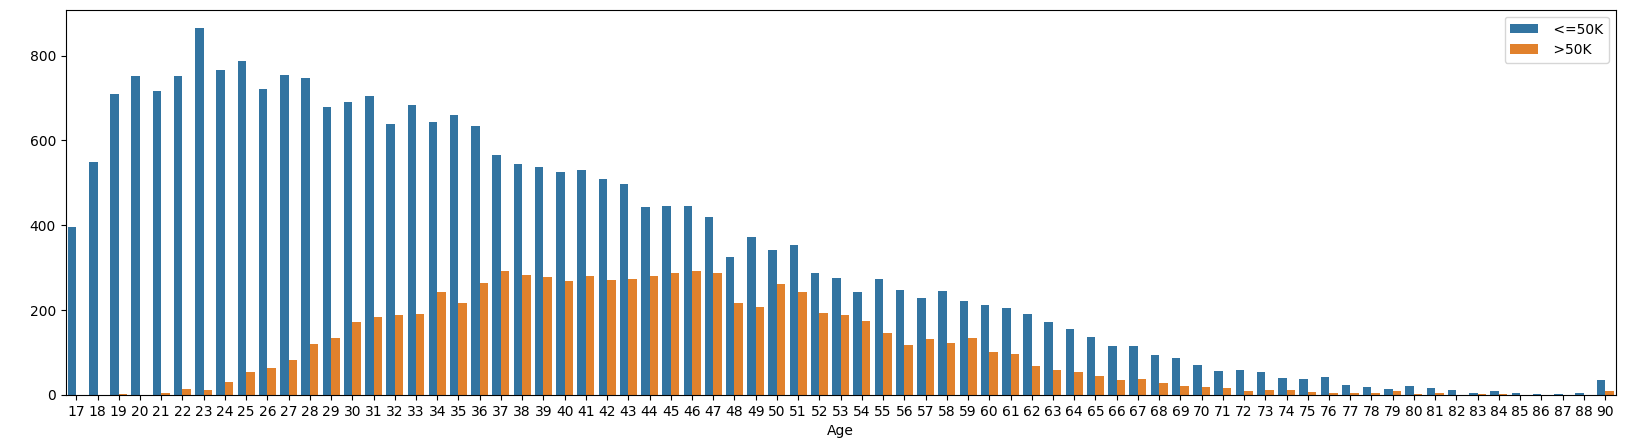

In [8]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(data= data, x='age', hue='income')
#ax.set_title("Income distribution by Age (per income group) ", loc='center', fontweight='bold', fontsize=18)
ax.set_xlabel("Age")
ax.set_ylabel(" ")
ax.legend(loc="upper right") 

From this graph it is visible that:
    1. Majority of the population earning less than 50K lies in the 
age group between 17 - 40 with the highest being at 24.
    2. Most of the people earning >50K lie in the age group between 34 - 50.

/var/folders/dm/n6mxv2gx5k16st989zj1sk5m0000gn/T/ipykernel_34762/2553065066.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1 = sns.kdeplot(data.loc[data['income']== " <=50K", "age"], label = '<=50K', shade=True)
/var/folders/dm/n6mxv2gx5k16st989zj1sk5m0000gn/T/ipykernel_34762/2553065066.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['income']== " >50K", "age"], label = '>50K', shade=True, ax=ax1)


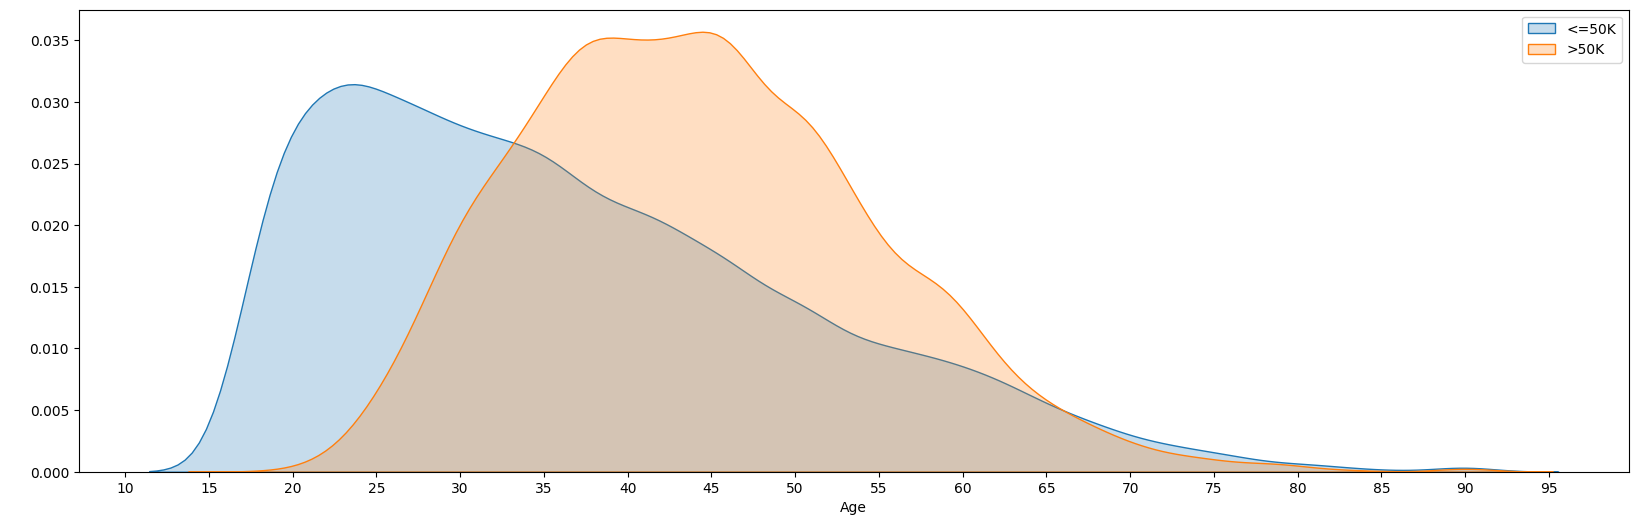

In [9]:
fig = plt.figure(figsize=(20,6))
ax1 = sns.kdeplot(data.loc[data['income']== " <=50K", "age"], label = '<=50K', shade=True)
sns.kdeplot(data.loc[data['income']== " >50K", "age"], label = '>50K', shade=True, ax=ax1)
plt.xticks(np.arange(10,100,5))
#ax1.set_title("Income distribution by Age (by income group)", loc='center', fontweight='bold', fontsize=18)
ax1.set_xlabel("Age")
ax1.set_ylabel(" ")
ax1.legend(loc="upper right")

WORKING CLASS

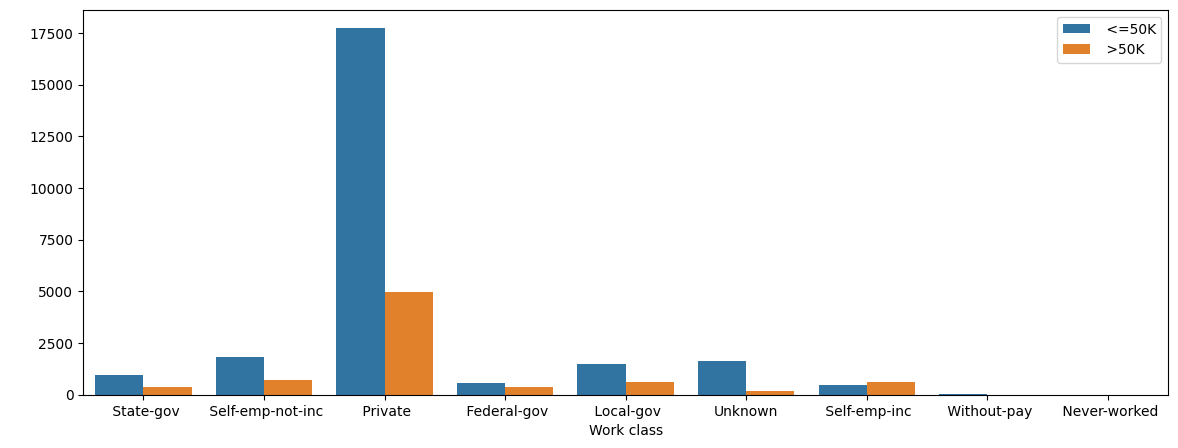

In [10]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(14,5))
data.loc[data.workclass == ' ?', 'workclass'] = 'Unknown'
ax2 = sns.countplot(data= data, x='workclass', hue='income')
#ax2.set_title("Income count by work class (by income group)", loc='center', fontweight='bold', fontsize=18)
ax2.set_xlabel("Work class")
ax2.set_ylabel(" ")
ax2.legend(loc="upper right")

From this graph it is visible that the majority of the income generators belong to the private sector. The next 2 cells give us an estimate of what percentage of the total population belong to the private sector and what percentage among the private sector earn more than 50K.

In [13]:
countPrivate  = data[data['workclass']== " Private"].shape[0]
countAll = data.shape[0] 
print("The percentage of people under the private sector is: ", (countPrivate / (countAll))*100)

The percentage of people under the private sector is:  69.70301894904948


In [18]:
condition1 = data['workclass']== " Private"
condition2 = data['income'] == " <=50K"
condition3 = data['income'] == " >50K"
privateBelow  = data[condition1 & condition2].shape[0]
privateAbove  = data[condition1 & condition3].shape[0]
print("The percentage of the people working in the private sector earning below 50K is: ", (privateBelow/(privateBelow+privateAbove)*100))

The percentage of the people working in the private sector earning below 50K is:  78.13271060979908


EDUCATION AND EDUCATION-NUM

Since Education is a nominal variable and Education-num is an ordinal variable, both representing the same information, we will only use Education-num for our analysis.

In [19]:
data.groupby(['education','education_num']).size().reset_index().rename(columns={0:'count'})

,education,education_num,count
0,10th,6,933
1,11th,7,1175
2,12th,8,433
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
9,Bachelors,13,5355


We can see that the proportion of individuals with income level >50K is considerably higher after obtaining a bachelors degree or higher.

<Axes: xlabel='count', ylabel='education_num'>

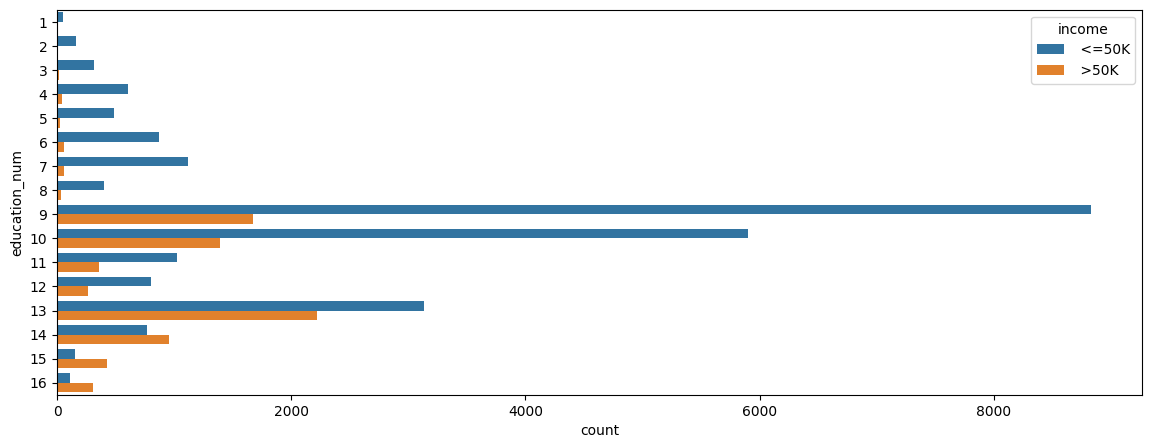

In [20]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= data, y='education_num', hue='income')

MARITAL STATUS

Marital Status seems to be a strong predictor of income level for all categories with the exception of "married_civ-spouse".

<Axes: xlabel='count', ylabel='maritial_status'>

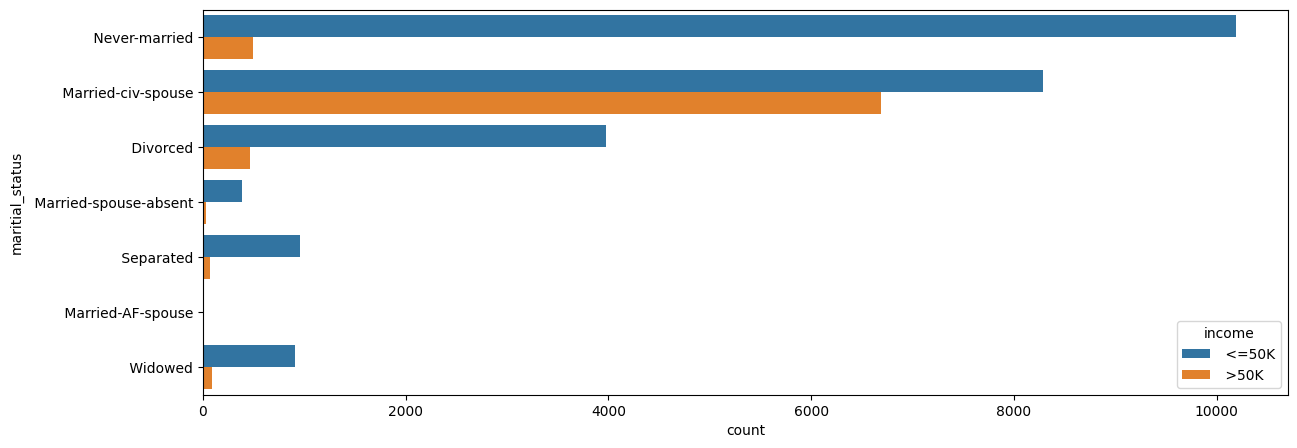

In [21]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= data, y='maritial_status', hue='income')

OCCUPATION

<Axes: xlabel='count', ylabel='occupation'>

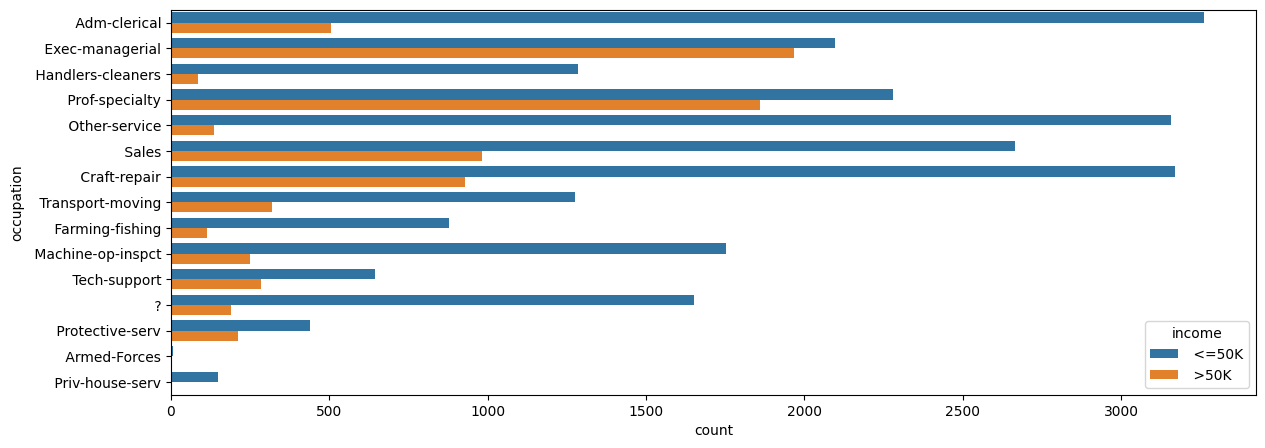

In [22]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= data, y='occupation', hue='income')

From this, it is visible that the majority of the population earning below 50K works in the clerical domain and craft repair fields, while the majority of the population earning more than 50K works in the managerial level or are speciality professionals.

RELATIONSHIP

<Axes: xlabel='count', ylabel='relationship'>

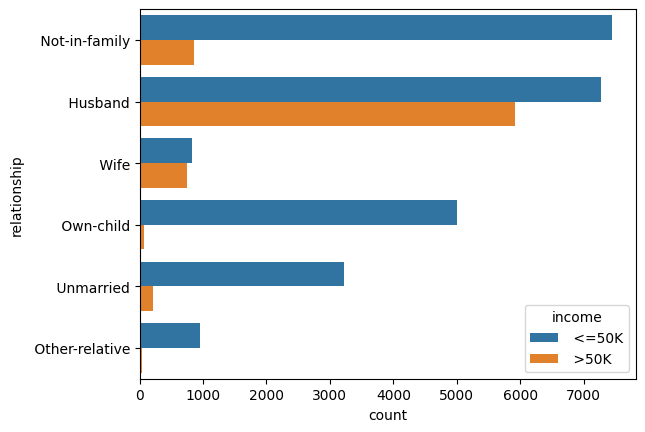

In [23]:
sns.countplot(data= data, y='relationship', hue='income')

RACE

<Axes: xlabel='race', ylabel='count'>

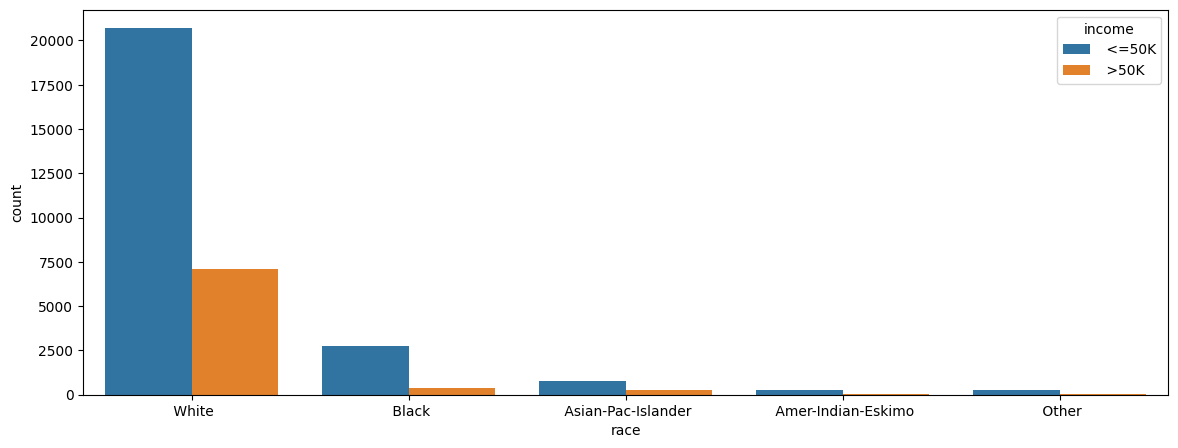

In [24]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= data, x='race', hue='income')
#g = sns.catplot(x="income", col="race", col_wrap=4, data=df [ (df.rac

SEX

Given that an individual is a women, the chances her income is  <=50K : 0.8905394113824158


<Axes: xlabel='sex', ylabel='count'>

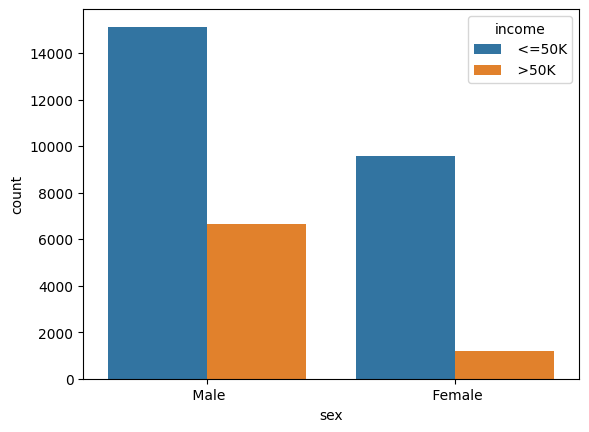

In [27]:
df_female = data [data.sex == " Female"]
print("Given that an individual is a women, the chances her income is  <=50K :", df_female[df_female.income == " <=50K"].shape[0]/df_female.shape[0])
sns.countplot(data= data, x='sex', hue='income')

CAPITAL GAIN AND CAPITAL LOSS

In [30]:
print("Percentage of the data with no capital gain: ", (data[ (data.capital_gain == 0)].shape[0]/data.shape[0])*100)
#print(df [ (df.capital_gain != 0)].shape[0]/df.shape[0])

Percentage of the data with no capital gain:  91.67101747489328


In [32]:
print("Percentage of the data with no capital loss: ", (data[ (data.capital_loss == 0)].shape[0]/data.shape[0])*100)
#sns.catplot(y="capital_loss",x="income", data=df [ (df.capital_loss != 0)], kind="box")

Percentage of the data with no capital loss:  95.33490986149073


Based on this analysis, the most relevant factors in determining an individual's income are :

Education

Sex

Marital Status

Occupation

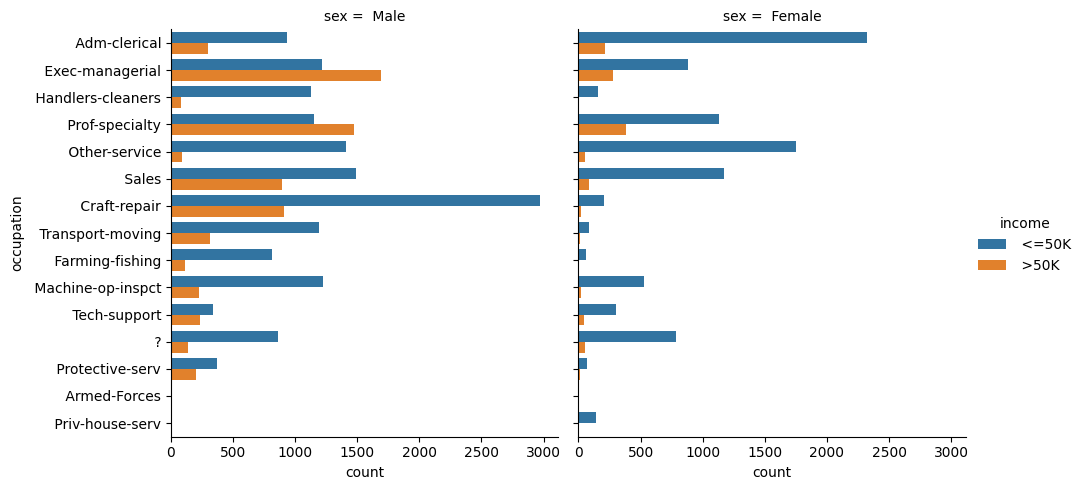

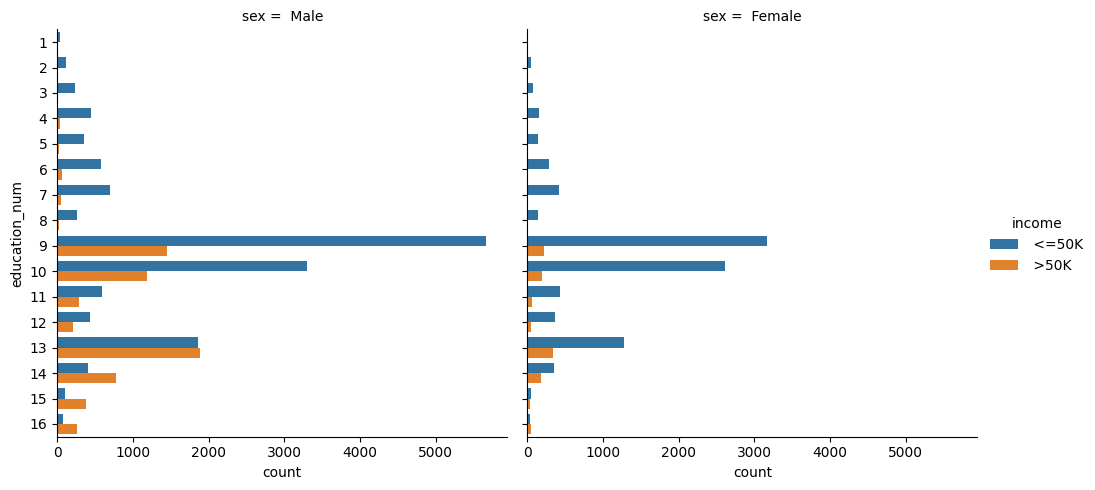

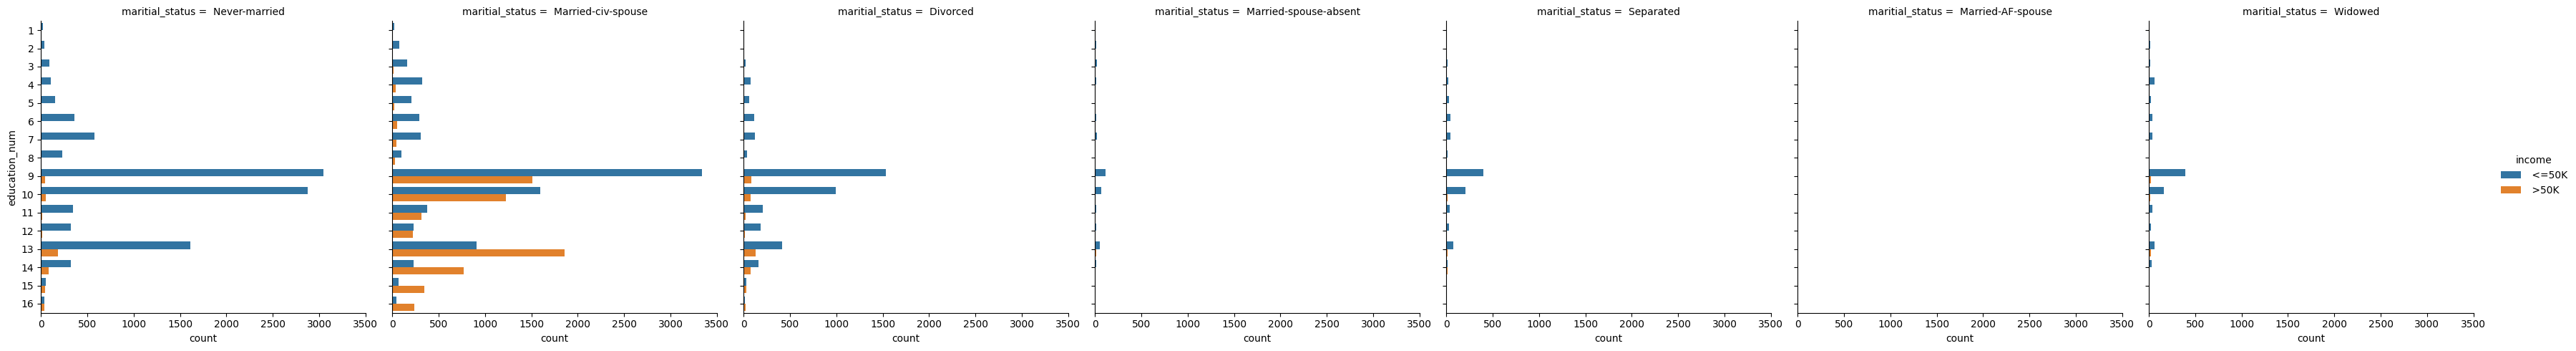

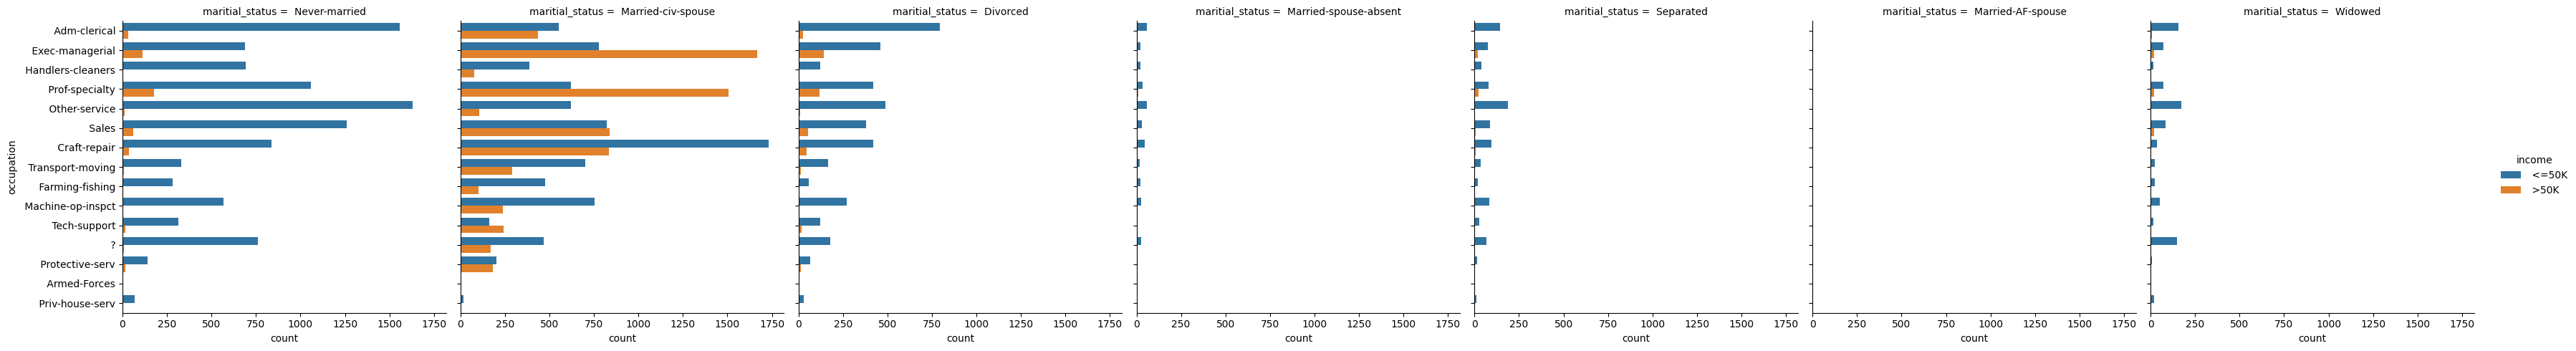

In [35]:
sns.catplot(col="sex",y="occupation",hue="income", data=data,kind="count")
sns.catplot(col="sex",y="education_num",hue="income", data=data,kind="count")
sns.catplot(col="maritial_status",y="education_num",hue="income", data=data,kind="count")
sns.catplot(col="maritial_status",y="occupation",hue="income", data=data,kind="count")